<a href="https://colab.research.google.com/github/hmrafid/ML_lab/blob/main/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

folder_path = os.path.join('/content/drive', 'MyDrive', 'DataSet1')


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/DataSet1/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/DataSet1/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5223 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [5]:
# normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
164/164 [==============================] - 558s 3s/step - loss: 1.1935 - accuracy: 0.9050 - val_loss: 31.3552 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 60s 352ms/step - loss: 0.4504 - accuracy: 0.9462 - val_loss: 44.3738 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 62s 366ms/step - loss: 0.2503 - accuracy: 0.9602 - val_loss: 27.6008 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 60s 355ms/step - loss: 0.1414 - accuracy: 0.9665 - val_loss: 5.6025 - val_accuracy: 0.6554
Epoch 5/10
164/164 [==============================] - 59s 337ms/step - loss: 0.0743 - accuracy: 0.9778 - val_loss: 1.3606 - val_accuracy: 0.7837
Epoch 6/10
164/164 [==============================] - 62s 365ms/step - loss: 0.0678 - accuracy: 0.9778 - val_loss: 4.6966 - val_accuracy: 0.6875
Epoch 7/10
164/164 [==============================] - 62s 366ms/step - loss: 0.0842 - accuracy: 0.9765 - val_loss: 9.1808 - val_a

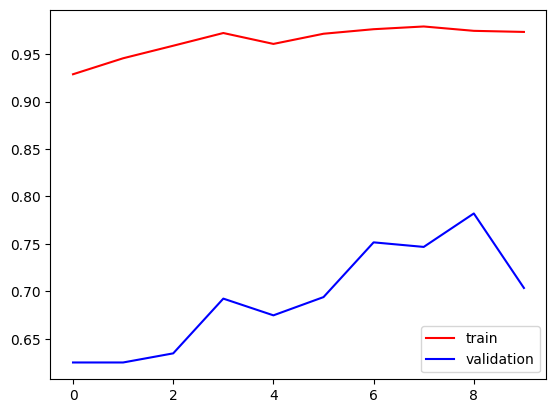

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

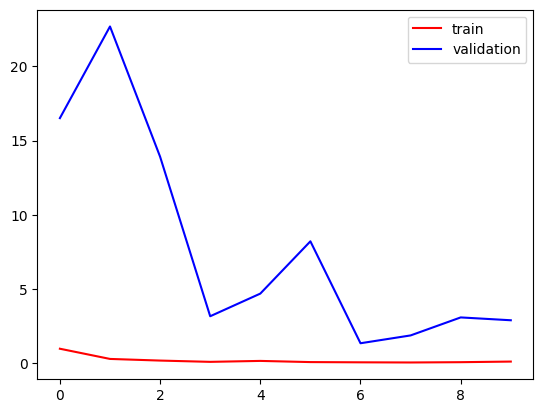

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()